<a href="https://colab.research.google.com/github/SonamWelekar/Hemp-Disease-Detection-and-Classification-using-Machine-learning-model/blob/master/Hemp_RF_90_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.2.0


In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 25kB/s 
     |████████████████████████████████| 419kB 48.5MB/s 
     |████████████████████████████████| 3.0MB 44.9MB/s 


In [ ]:
!pip install scikit-plot

**Importing libraries**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

/device:GPU:0


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
import keras
import glob
import cv2
import pickle, datetime

from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import the backend
from keras import backend as K
import os

Found GPU at: /device:GPU:0


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Giving directory path for loading dataset**

In [ ]:
print(os.listdir(r'drive/My Drive/FinalDataset'))

['train', 'test', 'val', 'sample_test_data']


**Loading training data and processing data (resizing) and saving as numpy arrays**

In [ ]:
train_hemp_images = []
train_hemp_labels = [] 
for directory_path in glob.glob("drive/My Drive/FinalDataset/train/*"):
    hemp_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_hemp_images.append(img)
        train_hemp_labels.append(hemp_label)
train_hemp_images = np.array(train_hemp_images)
train_hemp_labels = np.array(train_hemp_labels)

In [ ]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_hemp_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_hemp_labels])

**Total training data with size and channels**

In [ ]:
train_hemp_images.shape, train_label_ids.shape, train_hemp_labels.shape

((12165, 227, 227, 3), (12165,), (12165,))

**Loading validation data and processing data (resizing) and saving as numpy arrays**

In [ ]:
val_hemp_images = []
val_hemp_labels = [] 
for directory_path in glob.glob("drive/My Drive/FinalDataset/val/*"):
    hemp_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        val_hemp_images.append(img)
        val_hemp_labels.append(hemp_label)
val_hemp_images = np.array(val_hemp_images)
val_hemp_labels = np.array(val_hemp_labels)

In [ ]:
label_to_id = {v:i for i,v in enumerate(np.unique(val_hemp_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
val_label_ids = np.array([label_to_id[x] for x in val_hemp_labels])

In [ ]:
val_hemp_images.shape, val_label_ids.shape, val_hemp_labels.shape

((4032, 227, 227, 3), (4032,), (4032,))

**Loading testing data and processing data (resizing) and saving as numpy arrays**

In [ ]:
# test
test_hemp_images = []
test_hemp_labels = [] 
for directory_path in glob.glob("drive/My Drive/FinalDataset/test/*"):
    hemp_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        test_hemp_images.append(img)
        test_hemp_labels.append(hemp_label)
test_hemp_images = np.array(test_hemp_images)
test_hemp_labels = np.array(test_hemp_labels)

In [ ]:
label_to_id = {v:i for i,v in enumerate(np.unique(test_hemp_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
test_label_ids = np.array([label_to_id[x] for x in test_hemp_labels])

**Total testing data with size and channels**

In [ ]:
test_hemp_images.shape, test_label_ids.shape, test_hemp_labels.shape

((4023, 227, 227, 3), (4023,), (4023,))

**Sample Testing data**

In [ ]:
# sample test
sample_test_hemp_images = []
sample_test_hemp_labels = [] 
for directory_path in glob.glob("drive/My Drive/FinalDataset/sample_test_data/*"):
    hemp_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        sample_test_hemp_images.append(img)
        sample_test_hemp_labels.append(hemp_label)
sample_test_hemp_images = np.array(sample_test_hemp_images)
sample_test_hemp_labels = np.array(sample_test_hemp_labels)

In [ ]:
label_to_id = {v:i for i,v in enumerate(np.unique(sample_test_hemp_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
sample_test_label_ids = np.array([label_to_id[x] for x in sample_test_hemp_labels])

In [ ]:
sample_test_hemp_images.shape, sample_test_label_ids.shape, sample_test_hemp_labels.shape

((12, 227, 227, 3), (12,), (12,))

**Total training and testing data with x and y values and total classes**

In [ ]:
x_train, y_train,x_sample_test,y_sample_test, x_test, y_test, N_CATEGORY =train_hemp_images,train_hemp_labels,sample_test_hemp_images,sample_test_hemp_labels,test_hemp_images,test_hemp_labels,len(label_to_id)

print(x_train.shape, y_train.shape,x_sample_test.shape,y_sample_test.shape, x_test.shape, y_test.shape, N_CATEGORY)

(12165, 227, 227, 3) (12165,) (12, 227, 227, 3) (12,) (4023, 227, 227, 3) (4023,) 6


In [ ]:
id_to_label

{0: 'drive/My Drive/FinalDataset/test/HealthyHemp',
 1: 'drive/My Drive/FinalDataset/test/HempBudRot',
 2: 'drive/My Drive/FinalDataset/test/HempLeafSpots',
 3: 'drive/My Drive/FinalDataset/test/HempNutrientDeficiency',
 4: 'drive/My Drive/FinalDataset/test/HempPowderyMildew',
 5: 'drive/My Drive/FinalDataset/test/NotHemp'}

In [ ]:
train_data_dir = "/content/drive/My Drive/Dataset1/train"
val_data_dir = "/content/drive/My Drive/Dataset1/val"
test_data_dir = "/content/drive/My Drive/Dataset1/test"

category_names = sorted(os.listdir(train_data_dir))
print(category_names)
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

**Sample training images**

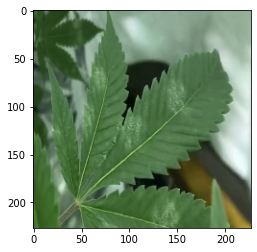

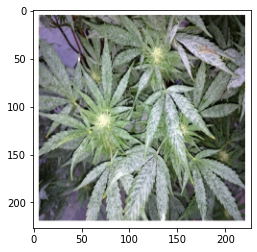

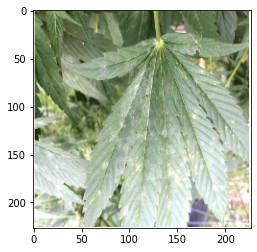

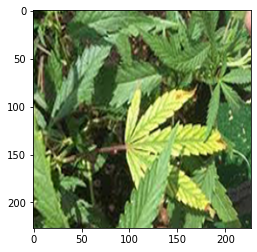

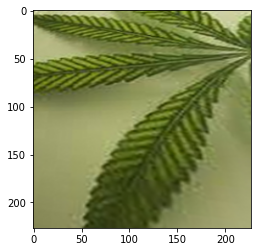

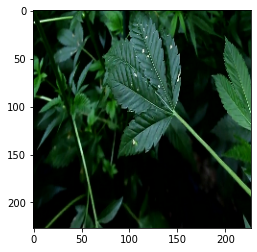

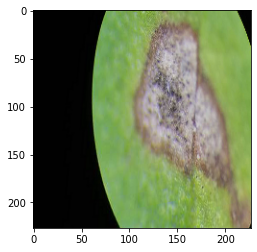

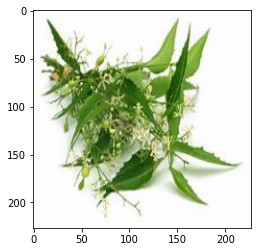

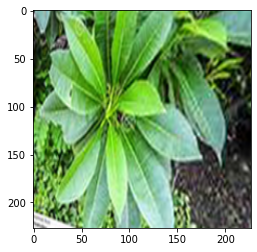

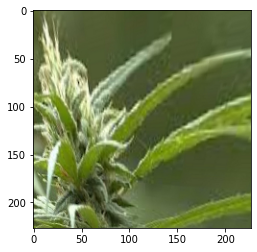

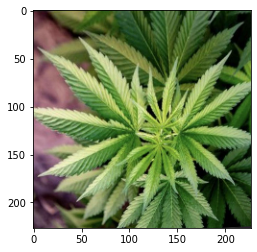

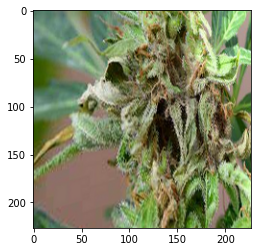

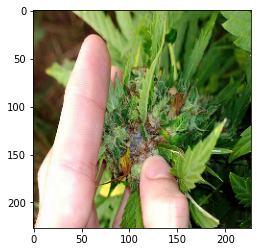

In [ ]:
for x in range (0,12165,1000):
    plt.show()
    plt.imshow(x_train[x])

**Sample Testing Images**

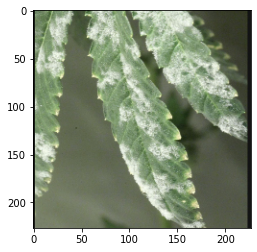

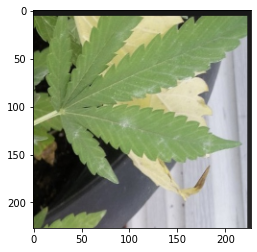

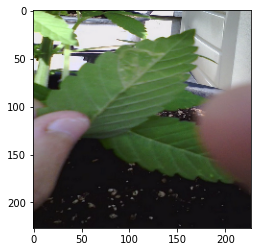

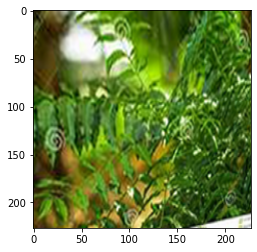

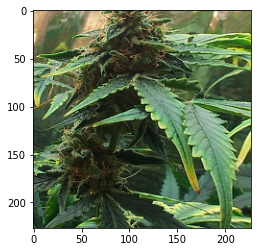

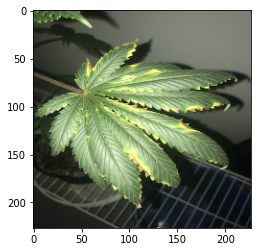

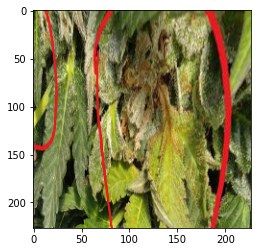

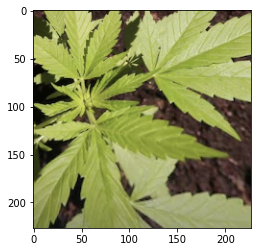

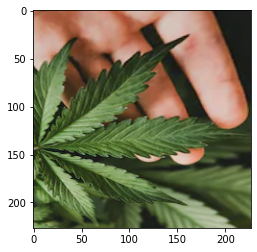

In [ ]:
for x in range(0,4023,500):
    plt.show()
    plt.imshow(x_test[x])

**Normalizing Data**

In [ ]:
x_train = (x_train / 255.0 - 0.5 )
#y_train = np.array(y_train)

In [ ]:
x_test= (x_test / 255.0 - 0.5 )
#y_test = np.array(y_test)

In [ ]:
print(x_train.shape, y_train.shape)

(12165, 227, 227, 3) (12165,)


In [ ]:
print(x_train[1])

[[[ 0.26078431  0.21372549  0.15490196]
  [ 0.25294118  0.19803922  0.07647059]
  [ 0.25686275  0.19803922  0.09607843]
  ...
  [ 0.26470588  0.32352941  0.10784314]
  [ 0.21372549  0.27647059  0.04509804]
  [ 0.2372549   0.3         0.05686275]]

 [[ 0.26470588  0.22156863  0.1627451 ]
  [ 0.26078431  0.20980392  0.08823529]
  [ 0.25686275  0.19803922  0.09607843]
  ...
  [ 0.25686275  0.31176471  0.07647059]
  [ 0.24901961  0.30392157  0.06470588]
  [ 0.1         0.15490196 -0.08431373]]

 [[ 0.26862745  0.2254902   0.16666667]
  [ 0.26862745  0.21764706  0.09215686]
  [ 0.25686275  0.20196078  0.09607843]
  ...
  [ 0.18235294  0.24117647 -0.00980392]
  [ 0.23333333  0.28823529  0.04117647]
  [ 0.18235294  0.2372549  -0.00588235]]

 ...

 [[-0.17843137 -0.14705882 -0.30392157]
  [-0.24117647 -0.19803922 -0.42941176]
  [-0.26470588 -0.21372549 -0.4254902 ]
  ...
  [ 0.01764706  0.05294118 -0.16666667]
  [ 0.02941176  0.06470588 -0.15882353]
  [ 0.04117647  0.07647059 -0.14705882]]

 [

**Alexnet CNN model for feature extraction**

In [ ]:
def get_alexnet(input_shape,nb_classes,model = Sequential()): 
# Layer 1 
    model.add(Convolution2D(96, 11, 11, input_shape = input_shape, border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2))) 
# Layer 2 
    model.add(Convolution2D(128, 5, 5, border_mode='same')) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2)) 
# Layer 3 
    model.add(ZeroPadding2D((1,1))) 
    model.add(Convolution2D(384, 3, 3, border_mode='same')) 
    model.add(Activation('relu')) 
# Layer 4 
    model.add(ZeroPadding2D((1,1))) 
    model.add(Convolution2D(192, 3, 3, border_mode='same')) 
    model.add(Activation('relu')) 
# Layer 5 
    model.add(ZeroPadding2D((1,1))) 
    model.add(Convolution2D(128, 3, 3, border_mode='same')) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2))) 
# Layer 6 
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(4096, init='glorot_normal')) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.5)) 
# Layer 7 
    model.add(Dense(4096, init='glorot_normal')) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.5)) 
# Layer 8 
    model.add(Dense(nb_classes, init='glorot_normal')) 
    model.add(Activation('tanh')) 
    return model

In [ ]:
alexnet = get_alexnet((227,227,3),N_CATEGORY)
alexnet.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (11, 11), input_shape=(227, 227,..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 227, 227, 96)      34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 96)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     307328    
_________________________________________________________________
activation_1 (Activation)    (None, 113, 113, 128)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 384)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4096, kernel_initializer="glorot_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: 

In [ ]:
#Pick the first Fully-Connected layer as the features which will be of dimension (1 x 4096)
layer_name = 'dense_1'
FC_layer_model= Model(inputs=alexnet.input,
                                 outputs=alexnet.get_layer(layer_name).output)

**Extracting features and creating dataframe for training data**

In [ ]:
#Find the Features for n number of train images and we will get n x 4096
#This means we will get 4096 features for each images.
i=0
features=np.zeros(shape=(x_train.shape[0],4096))
for directory_path in glob.glob("drive/My Drive/FinalDataset/train/*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = np.expand_dims(img, axis=0)
        FC_output = FC_layer_model.predict(img)
        features[i]=FC_output
        i+=1

In [ ]:
#Save the features of the train images to use it in future.
np.save('features', features)

In [ ]:
#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(4096):
    feature_col.append("f_"+str(i))
    i+=1

In [ ]:
#Create DataFrame with features and coloumn name
train_features=pd.DataFrame(data=features,columns=feature_col)
feature_col = np.array(feature_col)

train_class = list(np.unique(train_label_ids))
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_label_ids.shape)
train_class

Training Features Shape: (12165, 4096)
Training Labels Shape: (12165,)


[0, 1, 2, 3, 4, 5]

**Random forest model wih default parameters**

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
rf10 = RandomForestClassifier()

rf10.fit(train_features, train_label_ids)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Random Forest Model for classification with n-estimators 250**

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)

rf.fit(train_features, train_label_ids)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Extracting features and creating dataframe for testing data**

In [ ]:
#Find the Features from Alexnet's FC layer for n number of test images and we will get n x 4096
i=0
features_test=np.zeros(shape=(y_test.shape[0],4096))
for directory_path in glob.glob("drive/My Drive/FinalDataset/test/*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = np.expand_dims(img, axis=0)
        FC_output = FC_layer_model.predict(img)
        features_test[i]=FC_output
        i+=1

In [ ]:
#Create DataFrame with features and coloumn name
test_features=pd.DataFrame(data=features_test,columns=feature_col)
feature_col = np.array(feature_col)

print('Test Features Shape:', test_features.shape)
print('Test Labels Shape:', test_label_ids.shape)

Test Features Shape: (4023, 4096)
Test Labels Shape: (4023,)


**Fitting model on training data**

In [ ]:
##Feed the features of the train images to Random Forest Classifier to predict its class
y_pred_train = rf.predict(train_features)

**Accuracy for training data**

In [ ]:
#Training Accuracy
accuracy=accuracy_score(y_pred_train , train_label_ids)
print('Accuracy:', accuracy*100, '%.')

Accuracy: 100.0 %.


In [ ]:
from sklearn.metrics import classification_report

**Classification report for training data**

In [ ]:
# training metrics
print("Training metrics:")
print(classification_report(y_true=train_label_ids , y_pred= y_pred_train))

Training metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2067
           1       1.00      1.00      1.00      2073
           2       1.00      1.00      1.00      2076
           3       1.00      1.00      1.00      2073
           4       1.00      1.00      1.00      2089
           5       1.00      1.00      1.00      1787

    accuracy                           1.00     12165
   macro avg       1.00      1.00      1.00     12165
weighted avg       1.00      1.00      1.00     12165



**Fitting default model on testing data** 

In [ ]:
#Feed the features of the test images to Random Forest Classifier to predict its class
y_pred_rf10= rf10.predict(test_features)

In [ ]:
#Testing accuracy
accuracy=accuracy_score(y_pred_rf10, test_label_ids)
print('Accuracy for testing data for default model:', accuracy*100, '%.')

Accuracy for testing data for default model: 89.36117325379071 %.


**Fitting hyperparameter tuned (n-estimators =250) rf model on testing data**

In [ ]:
#Feed the features of the test images to Random Forest Classifier to predict its class
y_pred_test = rf.predict(test_features)

**Accuracy of model for testing data**

In [ ]:
#Testing accuracy
accuracy=accuracy_score(y_pred_test , test_label_ids)
print('Final Accuracy for testing data:', accuracy*100, '%.')

Final Accuracy for testing data: 90.4797414864529 %.


**Evaluating model on single test data**

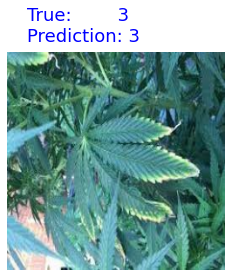

In [ ]:
truth = test_label_ids[0]
image = np.expand_dims(test_hemp_images[0], axis=0)

FC_output = FC_layer_model.predict(image)
 
image_features=pd.DataFrame(data=FC_output,columns=feature_col)
predictions_sam = rf.predict(image_features)
#plt.subplot(10,1,1+i)
plt.axis('off')
color='blue' if truth == predictions_sam[0] else 'red'
plt.text(20, 10, "True:        {0}\nPrediction: {1}\n".format(truth, predictions_sam[0]), 
fontsize=18, color=color)
plt.imshow(test_hemp_images[0])

**Evaluating model for 10 random images from test data**

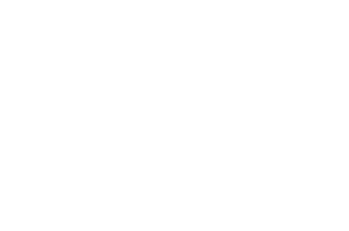

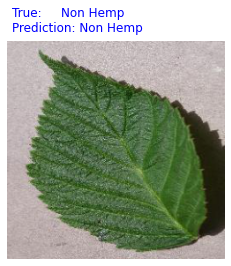

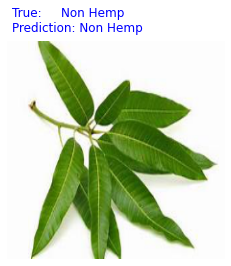

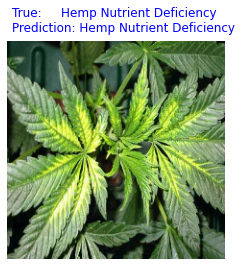

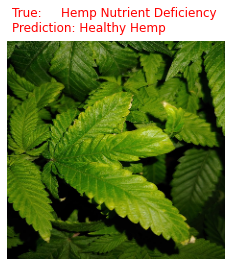

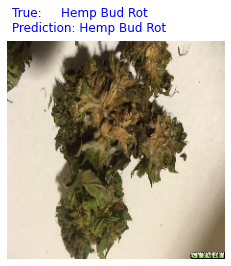

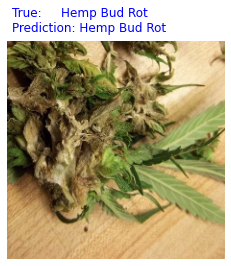

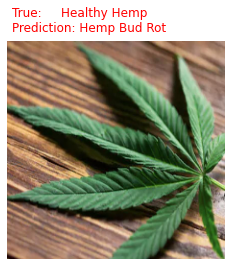

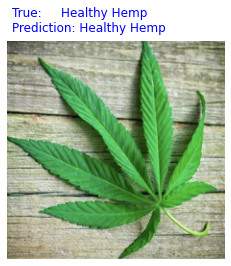

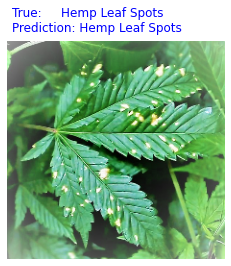

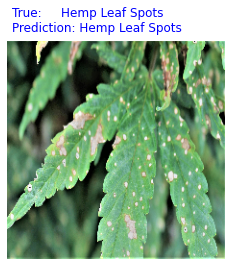

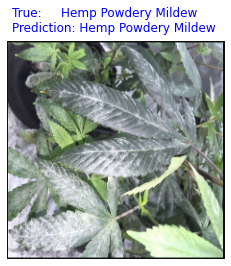

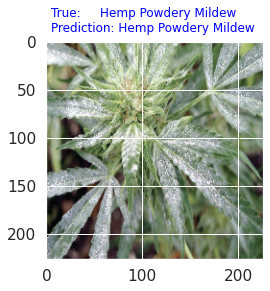

In [ ]:
for i in range(0, 12, 1):
    truth = sample_test_label_ids[i]
    image = np.expand_dims(sample_test_hemp_images[i], axis=0)
    FC_output = FC_layer_model.predict(image)
    image_features=pd.DataFrame(data=FC_output,columns=feature_col)
    predictions_sam = rf.predict(image_features)
    #plt.subplot(10,1,1+i)
    plt.axis('off')
    color='blue' if truth == predictions_sam[0] else 'red'
    if (truth == 0):
        stringTrue ='Healthy Hemp'
    elif (truth == 1):
        stringTrue ='Hemp Bud Rot'
    elif (truth == 2):
        stringTrue = 'Hemp Leaf Spots'
    elif (truth == 3):
        stringTrue = 'Hemp Nutrient Deficiency'
    elif (truth == 4):
        stringTrue = 'Hemp Powdery Mildew'
    else:
      stringTrue = 'Non Hemp'
    
    if (predictions_sam[0] == 0):
        stringPredicted ='Healthy Hemp'
    elif (predictions_sam[0] == 1):
        stringPredicted ='Hemp Bud Rot'
    elif (predictions_sam[0] == 2):
        stringPredicted = 'Hemp Leaf Spots'
    elif (predictions_sam[0] == 3):
        stringPredicted = 'Hemp Nutrient Deficiency'
    elif (predictions_sam[0] == 4):
        stringPredicted = 'Hemp Powdery Mildew'
    else:
      stringPredicted = 'Non Hemp'

    plt.show()
    plt.text(5, 5, "True:     {0}\nPrediction: {1}\n".format(stringTrue, stringPredicted), 
    fontsize=12, color=color)
    plt.imshow(sample_test_hemp_images[i])

**Classification report for testing data showing precision,recall,f1-score for individual classes**

In [ ]:
# testing metrics
print("Testing metrics:")
target_names = ['HealthyHemp','HempBudRot','HempLeafSpot','HempNutrientDef','HempPowderyMildew','NonHemp']
print(classification_report(y_true= test_label_ids, y_pred= y_pred_test,target_names=target_names))

Testing metrics:
                   precision    recall  f1-score   support

      HealthyHemp       0.91      0.89      0.90       683
       HempBudRot       0.88      0.91      0.89       685
     HempLeafSpot       0.94      0.87      0.90       689
  HempNutrientDef       0.89      0.86      0.87       684
HempPowderyMildew       0.87      0.96      0.91       692
          NonHemp       0.95      0.95      0.95       590

         accuracy                           0.90      4023
        macro avg       0.91      0.91      0.91      4023
     weighted avg       0.91      0.90      0.90      4023



**Confusion matrix for model performance visualization**

In [ ]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_label_ids, y_pred_test)
print(CM)

[[609  18  18  13  17   8]
 [ 11 620   3  26  24   1]
 [ 10  18 601  24  25  11]
 [ 17  29  13 587  28  10]
 [  4  15   4   6 662   1]
 [ 16   2   2   7   2 561]]


Text(43.499999999999986, 0.5, 'True label')

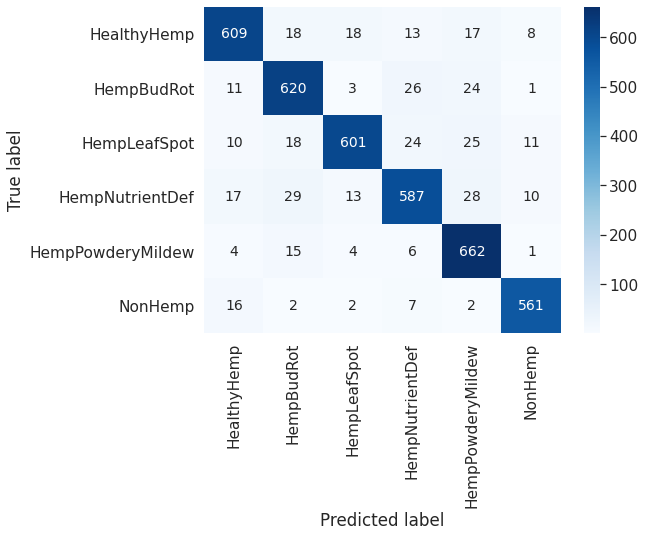

In [ ]:
index = ['HealthyHemp','HempBudRot','HempLeafSpot','HempNutrientDef','HempPowderyMildew','NonHemp']  
columns = ['HealthyHemp','HempBudRot','HempLeafSpot','HempNutrientDef','HempPowderyMildew','NonHemp']  
cm_df = pd.DataFrame(CM,columns,index)                      
plt.figure(figsize=(8,6))  
sn.heatmap(cm_df, annot=True,annot_kws={"size": 14},fmt='d',cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')

**Normalize Confusion Matrix**

In [ ]:
cmn = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print(cmn)

[[0.89165447 0.02635432 0.02635432 0.01903367 0.02489019 0.01171303]
 [0.01605839 0.90510949 0.00437956 0.0379562  0.0350365  0.00145985]
 [0.01451379 0.02612482 0.87227866 0.03483309 0.03628447 0.01596517]
 [0.0248538  0.04239766 0.01900585 0.85818713 0.04093567 0.01461988]
 [0.00578035 0.0216763  0.00578035 0.00867052 0.9566474  0.00144509]
 [0.02711864 0.00338983 0.00338983 0.01186441 0.00338983 0.95084746]]


Text(43.499999999999986, 0.5, 'True label')

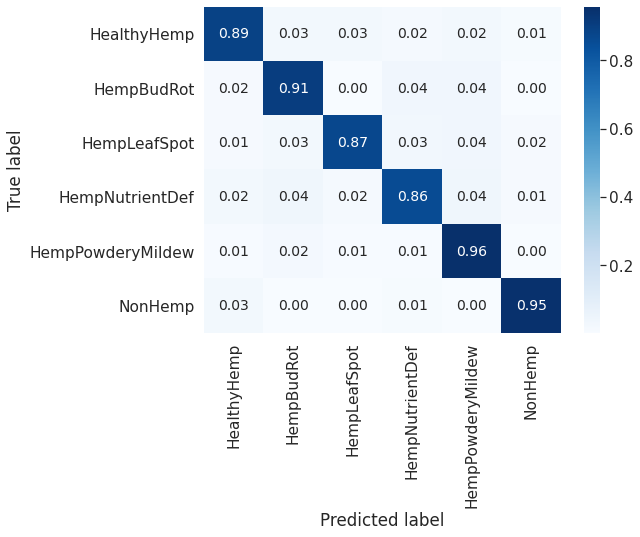

In [ ]:
index = ['HealthyHemp','HempBudRot','HempLeafSpot','HempNutrientDef','HempPowderyMildew','NonHemp']  
columns = ['HealthyHemp','HempBudRot','HempLeafSpot','HempNutrientDef','HempPowderyMildew','NonHemp']  
cmn_df = pd.DataFrame(cmn,columns,index)                      
plt.figure(figsize=(8,6))  
sn.heatmap(cmn_df, annot=True,annot_kws={"size": 14},fmt='.2f',cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')

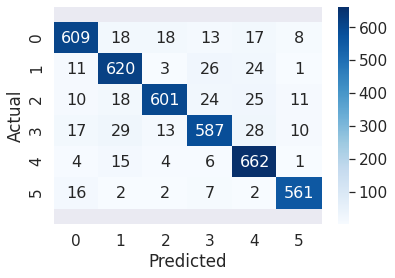

In [ ]:
# Visualize it as a heatmap
import seaborn as sn
sn.set(font_scale=1.4) # for label size
ax=sn.heatmap(CM,annot=True,annot_kws={"size": 16},fmt='d',cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Plotting ROC with AUC for hyperparameter tuned model**

In [ ]:
#Calculate the y_score
y_score = rf.predict_proba(test_features)

In [ ]:
#Binarize the output
label_binarize = LabelBinarizer()
y_one_hot_test = label_binarize.fit_transform(y_test)
#y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
#n_classes = y_test_bin.shape[1]

In [ ]:
n_classes = y_one_hot_test.shape[1]
print (n_classes)

6


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

AUC for Class 1: 0.9851636405081491
AUC for Class 2: 0.9883592168045029
AUC for Class 3: 0.9891647214824089
AUC for Class 4: 0.9836059400773072
AUC for Class 5: 0.9928721781547662
AUC for Class 6: 0.9974319540649824


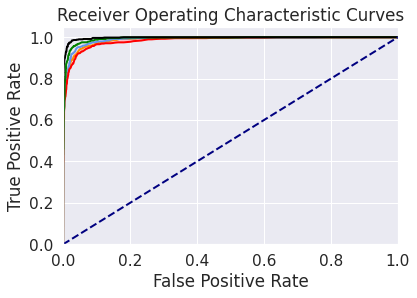

In [ ]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()

colors = cycle(['pink', 'darkorange', 'cornflowerblue','red','green','black'])
for i, color in zip(range(n_classes), colors):
  fpr[i], tpr[i], _ = roc_curve(y_one_hot_test[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=color, lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


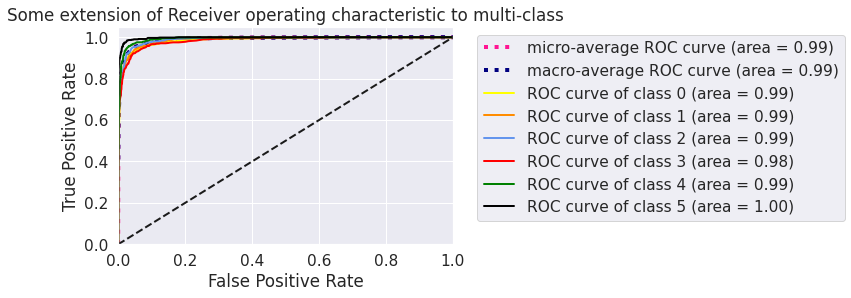

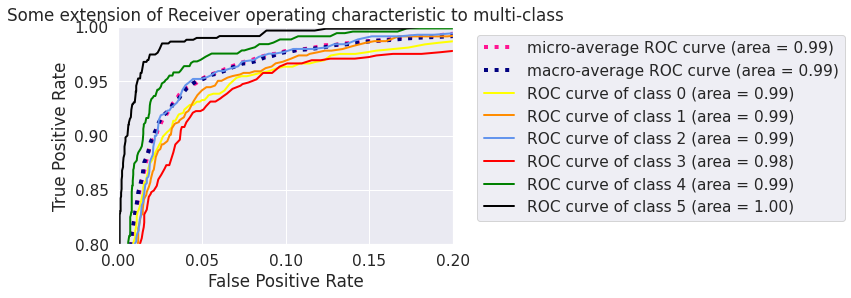

In [ ]:
from scipy import interp
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_one_hot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_one_hot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['yellow', 'darkorange', 'cornflowerblue','red','green','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['yellow', 'darkorange', 'cornflowerblue','red','green','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

**ROC-AUC for model**

In [ ]:
# testing plot 1 ovo ovr
from sklearn.metrics import roc_auc_score
y_prob = rf.predict_proba(test_features)

macro_roc_auc_ovo = roc_auc_score(test_label_ids, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_label_ids, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_label_ids, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_label_ids, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.989523 (macro),
0.989407 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.989433 (macro),
0.989253 (weighted by prevalence)


**TSNE features**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def plot_features(feature_labels, t_sne_features):
    """feature plot"""
    plt.figure(figsize=(9, 9), dpi=100)

    uniques = {x: labels.count(x) for x in feature_labels}
    od = collections.OrderedDict(sorted(uniques.items()))

    colors = itertools.cycle(["r", "b", "g", "c", "m", "y",
                              "slategray", "plum", "cornflowerblue",
                              "hotpink", "darkorange", "forestgreen",
                              "tan", "firebrick", "sandybrown"])
    n = 0
    for label in od:
        count = od[label]
        m = n + count
        plt.scatter(t_sne_features[n:m, 0], t_sne_features[n:m, 1], c=next(colors), s=10, edgecolors='none')
        c = (m + n) // 2
        plt.annotate(label, (t_sne_features[c, 0], t_sne_features[c, 1]))
        n = m

    plt.show()

In [ ]:
def plot(x, colors):
  
    palette = np.array(sn.color_palette("hls", 6))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(6):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

In [ ]:
tsne_features = TSNE().fit_transform(features)
np.savez('tsne_features', tsne_features=tsne_features)
print('t-sne features obtained and saved.')



t-sne features obtained and saved.


ValueError: ignored

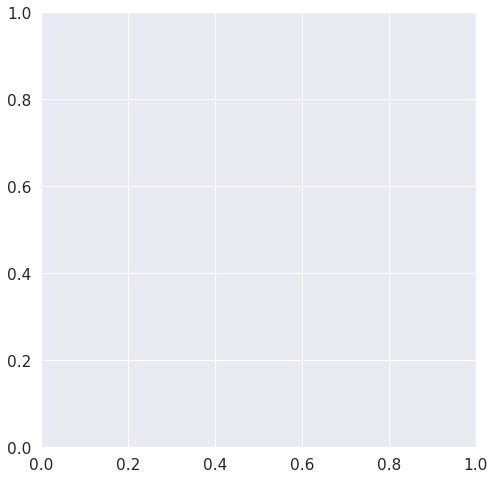

In [ ]:
plot(tsne_features,y_train)

**Visuaization of tree for n-estimator = 0**

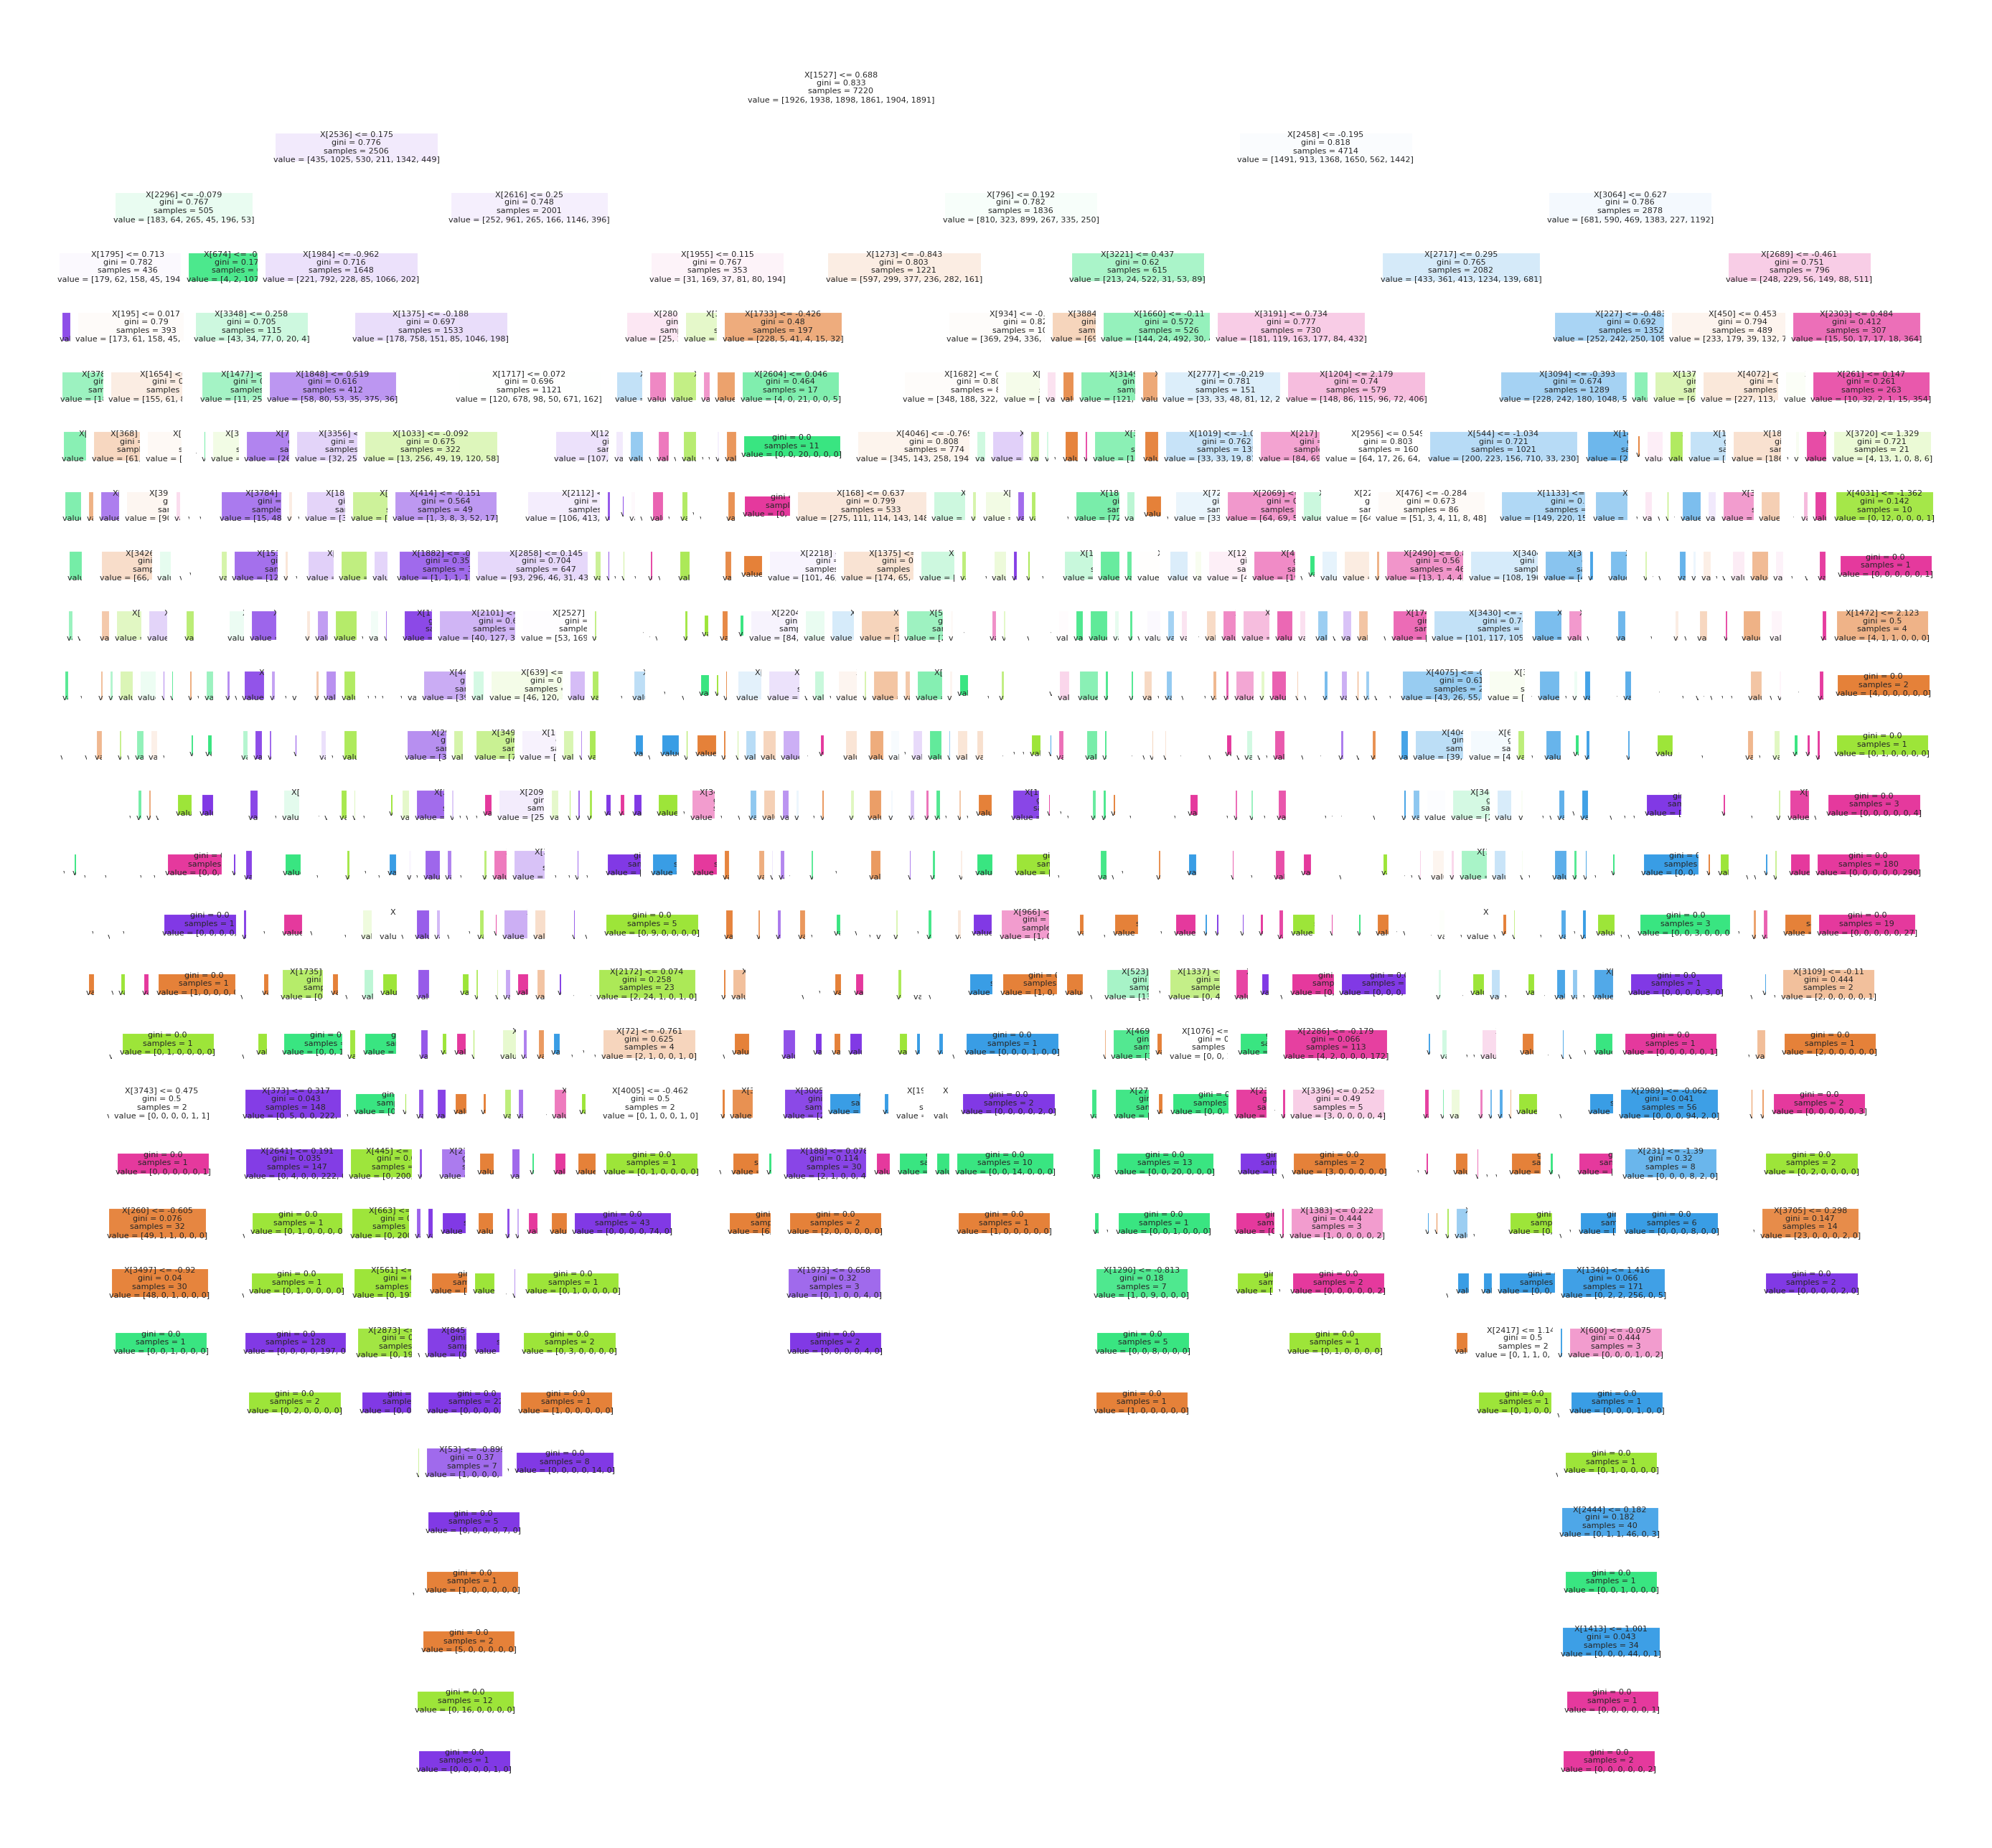

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               filled = True);

**Visualization for 5 decision trees for the random forest model**

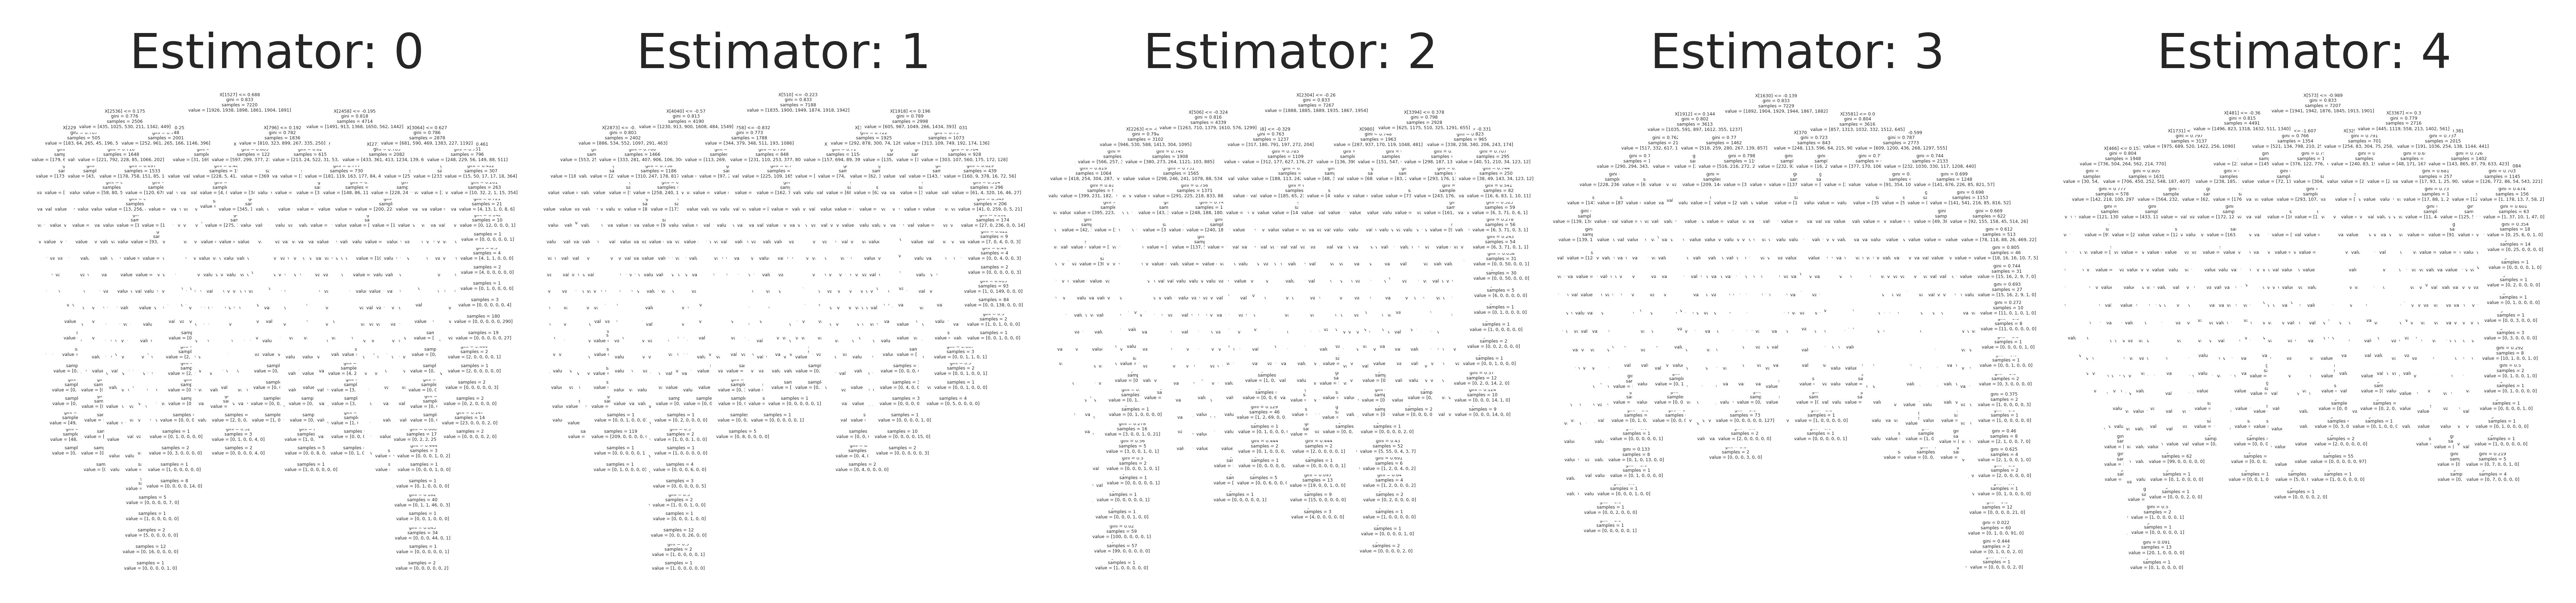

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                  ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('rf_5trees.png')

**Saving the model using pickle**

In [ ]:
# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)

In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
# Calculate the accuracy score and predict target values

Ypredict = pickle_model.predict(test_features)
accuracy=accuracy_score(Ypredict , test_label_ids)
print('Accuracy for testing data using pickle:', accuracy*100, '%.')